# Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.random.set_seed(42)
np.random.seed(42)

# Dataframe

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tesi/Agrimonia_scaled_Bertonico.csv")
pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#df['IDStations'] = df['IDStations'].astype(float)
df['AQ_pm10'] = df['AQ_pm10'].astype(float)
df['AQ_nh3'] = df['AQ_nh3'].astype(float)
df['AQ_nox'] = df['AQ_nox'].astype(float)
df['AQ_no2'] = df['AQ_no2'].astype(float)

df['EM_nh3_livestock_mm'] = df['EM_nh3_livestock_mm'].astype(float)
df['EM_nh3_agr_soils'] = df['EM_nh3_agr_soils'].astype(float)
df['EM_nh3_agr_waste_burn'] = df['EM_nh3_agr_waste_burn'].astype(float)
df['EM_nh3_sum'] = df['EM_nh3_sum'].astype(float)
df['EM_nox_traffic'] = df['EM_nox_traffic'].astype(float)
df['EM_nox_sum'] = df['EM_nox_sum'].astype(float)
df['EM_so2_sum'] = df['EM_so2_sum'].astype(float)
df['LI_pigs'] = df['LI_pigs'].astype(float)
df['LI_bovine'] = df['LI_bovine'].astype(float)

In [6]:
df.dropna(inplace=True)
df

,Unnamed: 0,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,6204,0.055556,0.079344,0.165180,0.162747,0.236213,0.154064,0.233120,0.342432,0.166667,0.383430,0.012140,0.884630,0.937272,0.991311,0.169876,0.233792,0.103414,0.048313,0.016171,0.032644,0.358312,0.032485,0.212990,0.492368,0.887490,0.529688,0.175824,0.787484,0.502092,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1821,6205,0.069444,0.066230,0.077282,0.125915,0.187578,0.115605,0.130552,0.000841,0.000000,0.556840,0.216996,0.529030,0.735466,0.859625,0.125796,0.179624,0.112693,0.007291,0.014155,0.027715,0.351300,0.028003,0.220597,0.494498,0.882519,0.529688,0.175824,0.787484,0.502092,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1822,6206,0.180556,0.167869,0.139331,0.229555,0.104617,0.116420,0.181653,0.010648,0.000000,0.383430,0.213732,0.492071,0.648345,0.859432,0.192053,0.242633,0.104521,0.027721,0.012056,0.022862,0.344062,0.023307,0.228204,0.496273,0.877713,0.529688,0.175824,0.787484,0.502092,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,6209,0.416667,0.104918,0.407006,0.623547,0.079270,0.258197,0.166493,0.006207,0.166667,0.300578,0.055368,0.930703,0.919531,0.913304,0.191597,0.17141

In [7]:
# Define the features (independent variables) and the target (dependent variable)
X = df.drop(columns=['AQ_pm10'])
y = df['AQ_pm10']

Number of Epochs: 200
Number of Iterations: 10
15/15 [==============================] - 0s 7ms/step
MAE (Iteration 1): 0.1
R-squared (R2) (Iteration 1): -0.05
RMSE (Iteration 1): 0.13
Training time: 170.98 seconds


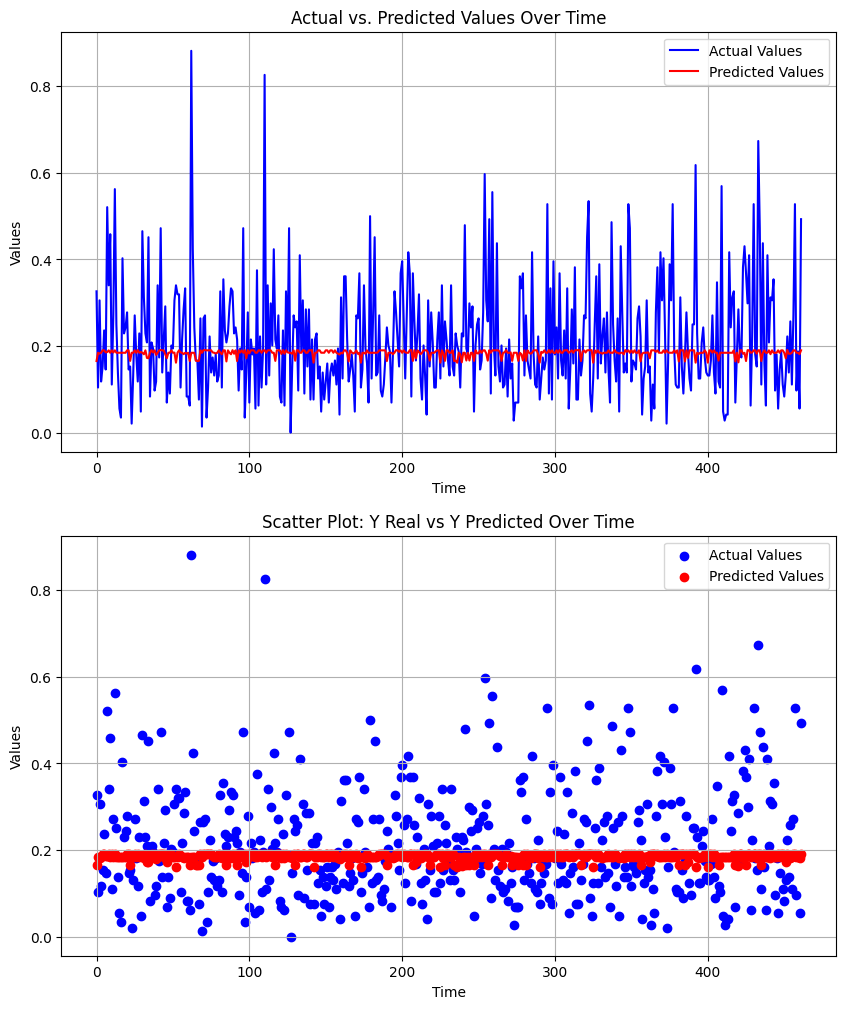

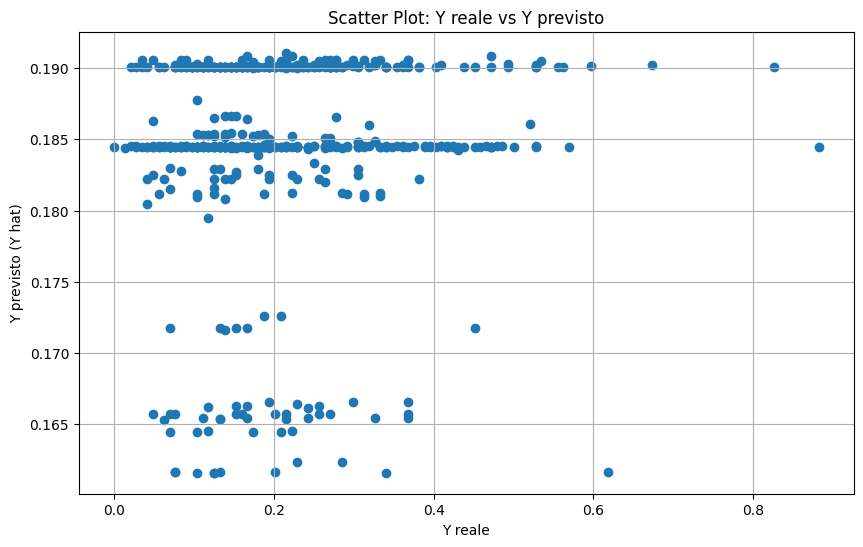

<Figure size 640x480 with 0 Axes>

Model Completion: 1/144 (0.69%)
Saving data...
15/15 [==============================] - 0s 8ms/step


ValueError: ignored

In [8]:
import time
import json
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Inizializza una lista vuota per salvare i risultati
results = []

# Imposta i range di iperparametri
units_hidden_layer = [64, 128, 256]
learning_rates = [0.001, 0.01, 0.1]
num_iterations_range = [10, 20, 30, 40]
num_epochs_range = [200, 300, 400, 500]

# Inizializza le variabili per i risultati migliori
best_mae_test = float('inf')
best_r2_test = -float('inf')
best_rmse_test = float('inf')
best_model = None
best_history = None  # Aggiunto per salvare la storia del miglior modello
best_hyperparameters = None  # Aggiunto per salvare gli iperparametri del miglior modello

# Contatori
model_count = 0  # Contatore dei modelli completati
total_models = len(num_iterations_range) * len(units_hidden_layer) * len(learning_rates) * len(num_epochs_range)

# Variare il numero di epoche
for num_epochs in num_epochs_range:
    print(f"Number of Epochs: {num_epochs}")

    if model_count >= total_models:
        break

    for num_iterations in num_iterations_range:
        print(f"Number of Iterations: {num_iterations}")
        if model_count >= total_models:
            break

        for units in units_hidden_layer:
            if model_count >= total_models:
                break

            for iteration in range(num_iterations):
                if model_count >= total_models:
                    break

                # Dividi nuovamente i dati in set di addestramento e test
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

                # Crea un nuovo modello per ogni iterazione
                model = Sequential([
                    SimpleRNN(units=units, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
                    SimpleRNN(units=units, activation='relu', return_sequences=False),
                    Dense(1)
                ])

                # Variare gli iperparametri del modello
                lr = random.choice(learning_rates)

                model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error')

                start_time = time.time()
                # Addestra il modello
                history = model.fit(X_train, y_train, epochs=num_epochs, verbose=0)
                end_time = time.time()
                training_time = end_time - start_time

                # Calcola le metriche per il set di test
                y_test_pred = model.predict(X_test)

                # Check for NaN values in y_test and y_test_pred
                nan_indices = np.isnan(y_test)
                if np.any(nan_indices):
                    y_test = y_test[~nan_indices]
                    y_test_pred = y_test_pred[~nan_indices]

                mae_test = mean_absolute_error(y_test, y_test_pred)
                r2_test = r2_score(y_test, y_test_pred)
                rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

                # Controlla se le metriche sono le migliori finora
                if r2_test > best_r2_test:
                    best_mae_test = mae_test
                    best_r2_test = r2_test
                    best_rmse_test = rmse_test
                    best_model = model
                    best_history = history

                    # Salva gli iperparametri del modello migliore
                    best_hyperparameters = {
                        "Number of Epochs": num_epochs,
                        "Number of Iterations": num_iterations,
                        "Units Hidden Layer": units,
                        "Learning Rate": lr,
                        "training_time": training_time
                    }

                # Incrementa il contatore dei modelli completati
                model_count += 1

                # Stampa le metriche parziali per questa iterazione
                print(f"MAE (Iteration {iteration + 1}): {round(mae_test, 2)}")
                print(f"R-squared (R2) (Iteration {iteration + 1}): {round(r2_test, 2)}")
                print(f"RMSE (Iteration {iteration + 1}): {round(rmse_test, 2)}")
                print(f"Training time: {round(training_time, 2)} seconds")

                # Plot dei risultati per questa iterazione
                plt.figure(figsize=(10, 12))  # Adjust the figure size as needed
                time_index = range(len(y_test))

                # Plot the actual vs. predicted values
                plt.subplot(2, 1, 1)  # Create a 2x1 grid of subplots and select the first subplot
                plt.plot(time_index, y_test, label='Actual Values', color='blue')
                plt.plot(time_index, y_test_pred, label='Predicted Values', color='red')
                plt.xlabel("Time")
                plt.ylabel("Values")
                plt.title("Actual vs. Predicted Values Over Time")
                plt.legend()
                plt.grid(True)

                # Plot the scatter plot with time
                plt.subplot(2, 1, 2)  # Select the second subplot
                plt.scatter(time_index, y_test, label='Actual Values', color='blue')
                plt.scatter(time_index, y_test_pred, label='Predicted Values', color='red')
                plt.xlabel("Time")
                plt.ylabel("Values")
                plt.title("Scatter Plot: Y Real vs Y Predicted Over Time")
                plt.legend()
                plt.grid(True)

                # Plot dei risultati per questa iterazione
                plt.figure(figsize=(10, 6))
                plt.scatter(y_test, y_test_pred)
                plt.xlabel("Y reale")
                plt.ylabel("Y previsto (Y hat)")
                plt.title("Scatter Plot: Y reale vs Y previsto")
                plt.grid(True)
                plt.show()

                plt.tight_layout()
                plt.show()

                # Aggiungi i risultati di questa iterazione alla lista
                result = {
                    "R2": r2_test,
                    "MAE": mae_test,
                    "RMSE": rmse_test,
                    "Number of Hidden Layers": units,
                    "Learning Rate": lr,
                    "Number of Epochs": num_epochs,
                    "Number of Iterations": num_iterations,
                    "training_time": training_time
                }
                results.append(result)

                # Calcola la percentuale di completamento
                completion_percentage = (model_count / total_models) * 100
                print(f"Model Completion: {model_count}/{total_models} ({completion_percentage:.2f}%)")

                print("Saving data...")
                # Salva i risultati in un file JSON
                with open("results_rnn.json", "w") as json_file:
                    json.dump(results, json_file, indent=4)

# Stampa le metriche del modello migliore
print("\nBest Model Metrics:")
print(f"Best MAE: {round(best_mae_test, 2)}")
print(f"Best R-squared (R2): {round(best_r2_test, 2)}")
print(f"Best RMSE: {round(best_rmse_test, 2)}")

# Stampa gli iperparametri del modello migliore
print("\nBest Hyperparameters for the Best Model:")
print(f"Number of Epochs: {best_hyperparameters['Number of Epochs']}")
print(f"Number of Iterations: {best_hyperparameters['Number of Iterations']}")
print(f"Units Hidden Layer: {best_hyperparameters['Units Hidden Layer']}")
print(f"Learning Rate: {best_hyperparameters['Learning Rate']}")
print(f"Training Time for Best Model: {best_hyperparameters['training_time']} seconds")
